<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**
- **Input Layer:**
- **Hidden Layer:**
- **Output Layer:**
- **Activation Function:**


    Neuron: Neurons receive inputs, passing their signal (if activated) to the next layer if a certain threshold is reached and
    Input Layer: The input layer is made of your data. This is how your data begins to go through the network.
    Hidden Layer: The hidden layer can be made up of multiple layers and is where most of the variation in architecture of an NN occurs.
    Output Layer: The output is the prediction or classification that is given by your neural network.
    Activation: A neuron is activated according to one of many activation functions, such as tanh, relu, sigmoid, or linear. This would cause the neuron to send a signal on to the next neuron.
 


In [ ]:
Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

The neural network operates according to a loss function and it wants to minimize the loss, therefore it will keep iterating through the layers, according to a gradient. 

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

A Perceptron takes an input and multiplies each by a weight, sums it all up, and then the sum is passed through an activation function, the reult being the final value.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, PReLU
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
model1 = Sequential([
                     Dense(1, activation = 'sigmoid'),
                     Dense(1, activation = 'sigmoid')
])

In [6]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
stop = EarlyStopping(monitor = "accuracy", min_delta = 0.001, patience = 3)

In [8]:
h1 = model1.fit(X, y, epochs = 1000, verbose = 1)

Epoch 1/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5267
Epoch 2/1000
10/10 [==============================] - 0s 898us/step - loss: 0.6907 - accuracy: 0.5267
Epoch 3/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5267
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5267
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5267
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5267
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5267
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5267
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5267
Epoch 10/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.52

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [9]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [10]:
model2 = Sequential([
                     Dense(32, activation = 'relu'),
                     Dense(28, activation = 'relu'),
                     Dense(18, activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1, activation = 'relu')
])

In [11]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
stop = EarlyStopping(monitor = 'accuracy', min_delta = 0.01, patience = 3, mode = 'max')

In [14]:
h2 = model2.fit(X, y, epochs = 1000, verbose = 1)

Epoch 1/1000
10/10 [==============================] - 0s 2ms/step - loss: 7.3011 - accuracy: 0.5267
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 7.3011 - accuracy: 0.5267
Epoch 3/1000
10/10 [==============================] - 0s 1ms/step - loss: 7.3011 - accuracy: 0.5267
Epoch 4/1000
10/10 [==============================] - 0s 1ms/step - loss: 7.3011 - accuracy: 0.5267
Epoch 5/1000
10/10 [==============================] - 0s 1ms/step - loss: 7.3011 - accuracy: 0.5267
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 7.3011 - accuracy: 0.5267
Epoch 7/1000
10/10 [==============================] - 0s 4ms/step - loss: 7.3011 - accuracy: 0.5267
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 7.3011 - accuracy: 0.5267
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 7.3011 - accuracy: 0.5267
Epoch 10/1000
10/10 [==============================] - 0s 2ms/step - loss: 7.3011 - accuracy: 0.5267

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [15]:
!pip install mlxtend

C:\Users\SKrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


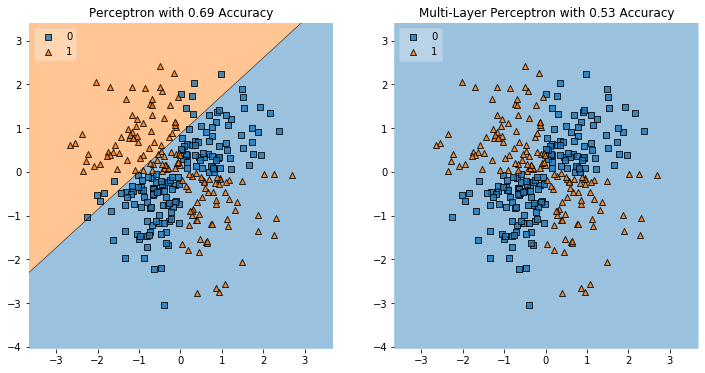

In [16]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

Multi-Layer Perceptrons more accurately learn the relationship between X and y due to the computational power of the hidden layers! When you add those hidden layers, they train on a set of the input and output layers and they "learn" what the correlation between the inputs and outputs are. This is useful for complex data (such as images) because it'll "learn" by separating each pixel!

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [18]:

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

#changing to 80/20
train, validate = train_test_split(df, train_size = 0.80, test_size = 0.20,
                                   stratify = df['target'], random_state = 42)

train.shape, validate.shape

((242, 14), (61, 14))

In [20]:
target = 'target'  #go figure ;)
y_train = train[target]
y_train.value_counts(normalize = True)

1    0.545455
0    0.454545
Name: target, dtype: float64

In [22]:
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

accuracy_score(y_train, y_pred)

0.5454545454545454

In [23]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

accuracy_score(y_train, y_pred)

0.5454545454545454

In [24]:
target = 'target'
X_train = train.drop(columns = target)
y_train = train[target]
X_val = validate.drop(columns = target)
y_val = validate[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((242, 13), (242,), (61, 13), (61,))

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [26]:
inputs = X_train_scaled.shape[1]
inputs

13

In [27]:
model = Sequential()

model.add(Dense(50, input_shape = (inputs,)))
model.add(Dense(35, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.0001, patience = 3, mode = 'min')

In [30]:
h1 = model.fit(X_train_scaled, y_train, epochs = 1000,
               validation_data = (X_val_scaled, y_val), callbacks = [stop])

Epoch 1/1000
8/8 [==============================] - 0s 26ms/step - loss: 0.6527 - accuracy: 0.6033 - val_loss: 0.5882 - val_accuracy: 0.7869
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.5710 - accuracy: 0.7727 - val_loss: 0.5255 - val_accuracy: 0.8033
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4969 - accuracy: 0.8347 - val_loss: 0.4812 - val_accuracy: 0.8033
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4340 - accuracy: 0.8595 - val_loss: 0.4541 - val_accuracy: 0.8197
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3888 - accuracy: 0.8678 - val_loss: 0.4424 - val_accuracy: 0.8197
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3514 - accuracy: 0.8843 - val_loss: 0.4382 - val_accuracy: 0.8197
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.3264 - accuracy: 0.8884 - val_loss: 0.4436 - val_accuracy: 0.8033
Epoch 8/1000
8/8 [=

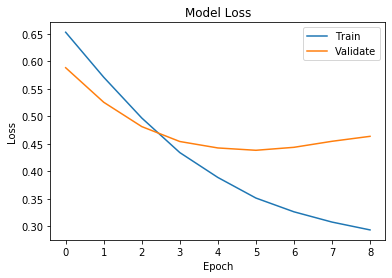

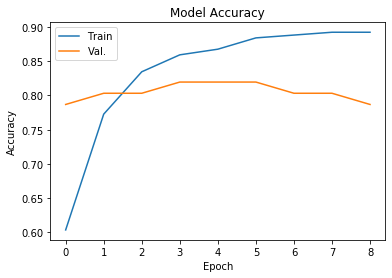

In [31]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss']) #add in the validation loss with this one
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'])
plt.show()

#Then accuracy
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy']) #adding in validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val.'])
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(learning_rate = 0.001, batch_size = 0):
  model = Sequential()
  
  model.add(Dense(32, input_shape = (13,)))
  model.add(Dense(26, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  #Compile
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
  return model
  
#creating the keras classifier
keras_model = KerasClassifier(build_fn = create_model, verbose = 1)

learning_rate= [0.0005, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 0.006,
             0.007, 0.008, 0.009, 0.01] 

batch_size = [0, 10, 20, 30]

params = {'learning_rate': [0.0005, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 
                         0.006, 0.007, 0.008, 0.009, 0.01], 
          'batch_size': [0, 10, 20, 30], 'epochs': [30]}

In [33]:
grid = GridSearchCV(estimator = keras_model, param_grid = params, n_jobs = -1,
                    verbose = 1, scoring = 'accuracy')
grid_result = grid.fit(X_train_scaled, y_train)

#getting mean, standard dev and parameters results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

C:\Users\SKrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.5min finished


Epoch 1/30
8/8 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.6653
Epoch 2/30
8/8 [==============================] - 0s 996us/step - loss: 0.5363 - accuracy: 0.7645
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.8099
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8306
Epoch 5/30
8/8 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8512
Epoch 6/30
8/8 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8554
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8636
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.3431 - accuracy: 0.8636
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8760
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8802
Epoch 11/30
8/8 [====================

In [34]:
pipeline = grid_result.best_estimator_
y_pred = pipeline.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_pred)
print("Keras Validation Accuracy=", val_accuracy)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
2/2 [==============================] - 0s 998us/step
Keras Validation Accuracy= 0.8032786885245902
